In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scienceplots
from scipy.stats import norm
from sklearn.mixture import GaussianMixture

np.random.seed(137)

# Example plot

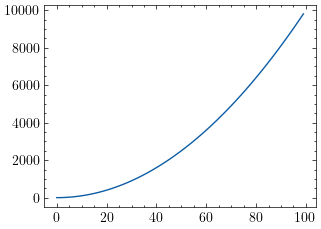

In [2]:
plt.style.use('science')
x=np.arange(100)
y=x**2
with plt.style.context('science'):
    plt.figure()
    plt.plot(x, y)
    plt.show()

# Generate Data

In [3]:
N=6000
priors=np.array([1/6,2/6,3/6])
cdf_priors=np.cumsum(priors)
mu=np.array([175,100,70])
sigma=np.array([7,9,8])
X1=np.empty((0,))
X2=np.empty((0,))
X3=np.empty((0,))
X=np.empty((0,))
for i in range(N):
    p=np.random.uniform()
    g=np.where(p<=cdf_priors)[0][0]
    x=round(np.random.normal(mu[g],sigma[g]))
    while x > 255 or x <0:
        x=round(np.random.normal(mu[g],sigma[g]))
    X=np.append(X,x)
    if g==0:
        X1=np.append(X1,x)
    if g==1:
        X2=np.append(X2,x)
    if g==2:
        X3=np.append(X3,x)




# Plot Data

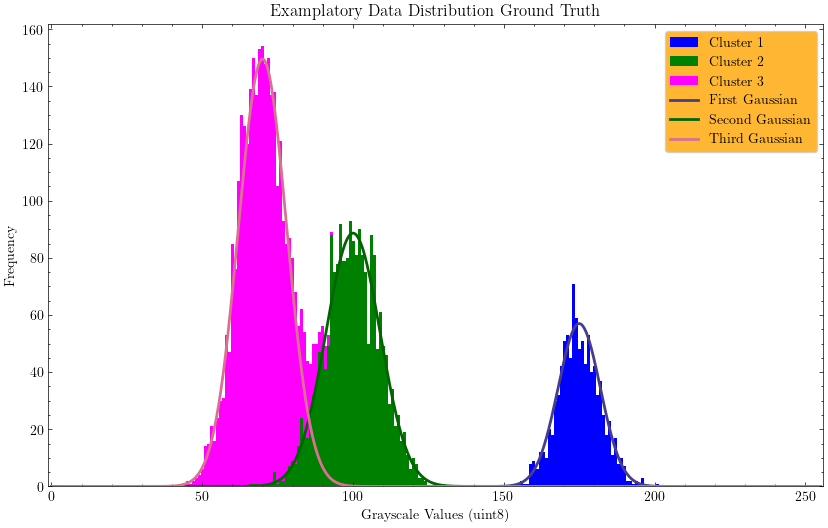

In [4]:
bins=np.arange(257)-0.5
t = np.linspace(0,255, 1000)
Y=[X1,X2,X3]
colors = ['blue', 'green', 'magenta']
labels = ['Cluster 1','Cluster 2','Cluster 3']
with plt.style.context('science'):
    plt.rcParams['figure.figsize'] = [10, 6]
    ax=plt.figure()
    plt.title("Examplatory Data Distribution Ground Truth")
    counts, bins, patches = plt.hist(Y, bins=bins, histtype='bar',color=colors, label=labels, stacked=True)
    plt.plot(t, priors[0]*N*norm.pdf(t, mu[0], sigma[0]),label="First Gaussian", color="darkslateblue", linewidth=2)
    plt.plot(t, priors[1]*N*norm.pdf(t, mu[1], sigma[1]),label="Second Gaussian", color="darkgreen", linewidth=2)
    plt.plot(t, priors[2]*N*norm.pdf(t, mu[2], sigma[2]),label="Third Gaussian", color="palevioletred", linewidth=2)
    plt.xlabel("Grayscale Values (uint8)")
    plt.ylabel("Frequency")
    plt.legend(frameon=True, facecolor="orange")
    plt.xlim(-1, 256)
    plt.show()
    


# Plain Plot of Data

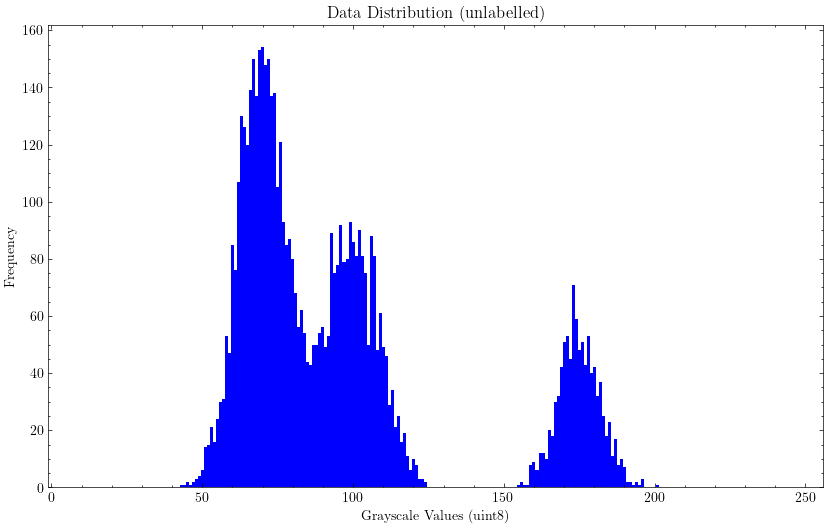

In [5]:
with plt.style.context('science'):
    x = np.linspace(0,255, 1000)
    plt.rcParams['figure.figsize'] = [10, 6]
    ax=plt.figure()
    plt.title("Data Distribution (unlabelled)")
    counts, bins, patches = plt.hist(X, bins=bins, histtype='bar',color=colors[0], stacked=True)
    plt.xlabel("Grayscale Values (uint8)")
    plt.ylabel("Frequency")
    plt.xlim(-1, 256)
    plt.show()

# Plot GMM Fit

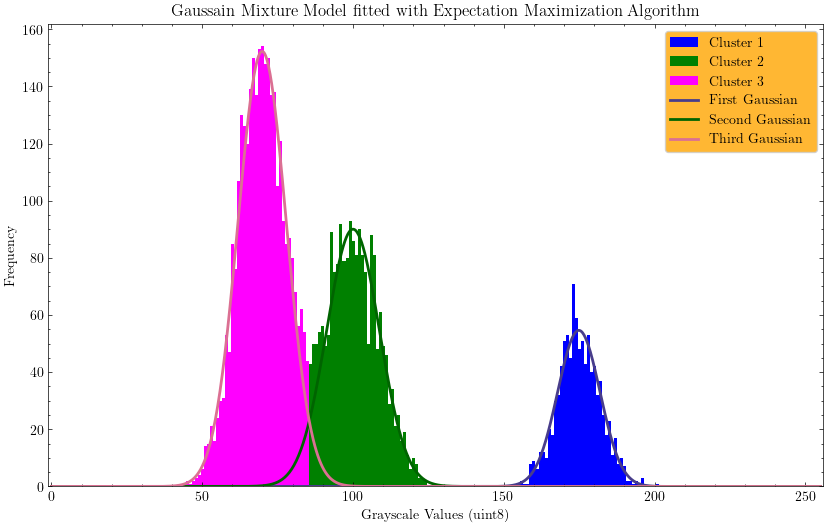

In [6]:
gmm = GaussianMixture(n_components=3, random_state=0).fit(X.reshape((-1,1)))
labels_gmm = gmm.fit_predict(X.reshape((-1,1)))
priors_gmm = gmm.weights_
means_gmm = gmm.means_.reshape((-1))
sigma_gmm = np.sqrt(gmm.covariances_.reshape((-1)))
Y1=X[labels_gmm==0]
Y2=X[labels_gmm==1]
Y3=X[labels_gmm==2]
colors = ['blue', 'magenta', 'green',]
labels = ['Cluster 1','Cluster 3','Cluster 2']
with plt.style.context('science'):
    x = np.linspace(0,255, 1000)
    plt.rcParams['figure.figsize'] = [10, 6]
    ax=plt.figure()
    plt.title("Gaussain Mixture  Model fitted with Expectation Maximization Algorithm")
    counts, bins, patches = plt.hist(Y1, bins=bins, histtype='bar',color=colors[0], label=labels[0], stacked=True)
    counts, bins, patches = plt.hist(Y3, bins=bins, histtype='bar',color=colors[2], label=labels[2], stacked=True)
    counts, bins, patches = plt.hist(Y2, bins=bins, histtype='bar',color=colors[1], label=labels[1], stacked=True)
    plt.plot(t, priors_gmm[0]*N*norm.pdf(t, means_gmm[0], sigma_gmm[0]),label="First Gaussian", color="darkslateblue", linewidth=2)
    plt.plot(t, priors_gmm[2]*N*norm.pdf(t, means_gmm[2], sigma_gmm[2]),label="Second Gaussian", color="darkgreen", linewidth=2)
    plt.plot(t, priors_gmm[1]*N*norm.pdf(t, means_gmm[1], sigma_gmm[1]),label="Third Gaussian", color="palevioletred", linewidth=2)
    plt.xlabel("Grayscale Values (uint8)")
    plt.ylabel("Frequency")
    plt.legend(frameon=True, facecolor="orange")
    plt.xlim(-1, 256)
    plt.show()

# PDf fit

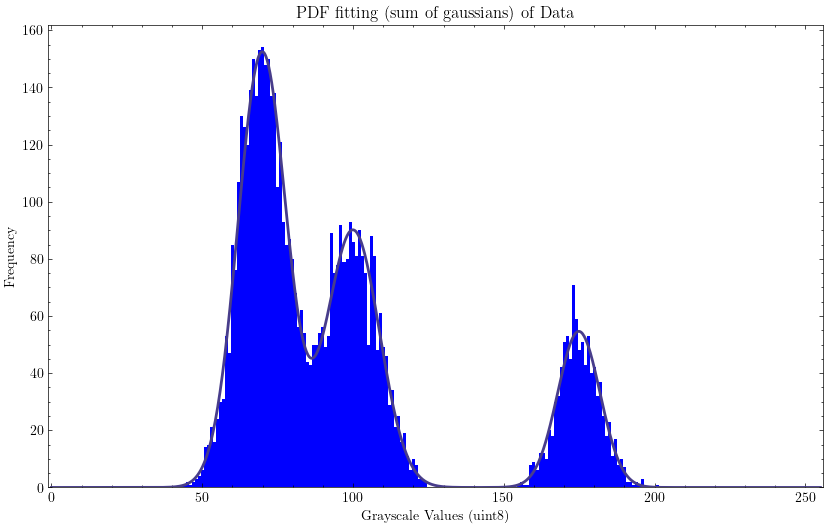

In [7]:
with plt.style.context('science'):
    x = np.linspace(0,255, 1000)
    plt.rcParams['figure.figsize'] = [10, 6]
    ax=plt.figure()
    plt.title("PDF fitting (sum of gaussians) of Data")
    counts, bins, patches = plt.hist(X, bins=bins, histtype='bar',color=colors[0], stacked=True)
    g1=priors_gmm[0]*N*norm.pdf(t, means_gmm[0], sigma_gmm[0])
    g2=priors_gmm[1]*N*norm.pdf(t, means_gmm[1], sigma_gmm[1])
    g3=priors_gmm[2]*N*norm.pdf(t, means_gmm[2], sigma_gmm[2])
    plt.plot(t, g1+g2+g3,label="First Gaussian", color="darkslateblue", linewidth=2)
    plt.xlabel("Grayscale Values (uint8)")
    plt.ylabel("Frequency")
    plt.xlim(-1, 256)
    plt.show()